In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import torch

def func_F(x, A):
    nemonator = torch.matmul(torch.matmul(x.t(), A), x)
    denominator = torch.matmul(x.t(), x)
    out = nemonator/denominator
    return out

def grad_F(x, A):
    nemonator = 2 * torch.matmul(A, x) * torch.matmul(x.t(), x) - torch.matmul(torch.matmul(x.t(), A), x) * 2 * x
    denominator = torch.matmul(x.t(), x) ** 2
    out = nemonator/denominator
    return out

def func_h(x, A):
    nemonator = torch.matmul(torch.matmul(x.t(), A), x)
    denominator = torch.norm(x) ** 2
    out = torch.matmul(A, x) - (nemonator/denominator) * x
    return out

def func_w(x, A):
    h_x = func_h(x, A)
    return torch.matmul(torch.matmul(h_x.t(), A), h_x)

def func_v(x, A):
    term_1 = (torch.norm(torch.matmul(A, x)) ** 2) / (torch.norm(x) ** 2)
    term_2 = func_F(x, A) ** 2
    return term_1 - term_2

def func_alpha_star(x, A):
    w_x = func_w(x, A)
    v_x = func_v(x, A)
    F_x = func_F(x, A)
    nemonator = -(w_x - F_x * v_x) + torch.sqrt((w_x - F_x * v_x) ** 2 + 4 * (v_x ** 3))
    denominator = 2 * (v_x ** 2)
    return nemonator / denominator

The number of required iterations: 304
The value of the objective function at convergence: -13.574511277318216


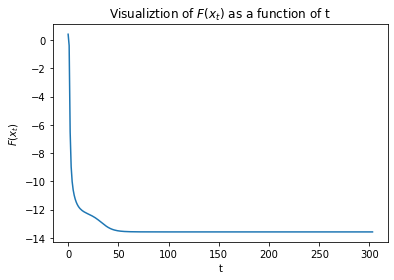

In [5]:
if __name__ == "__main__":
    A = pd.read_csv('homework2_data/project2_A.csv')
    A = A.drop(['Unnamed: 0'], axis=1).to_numpy()
    A = torch.tensor(A)
    
    x = torch.ones(A.shape[0], dtype = torch.float64)
    x_0 = x/np.sqrt(A.shape[0])

    epsilon = 1e-6
    N = 2000
    t = 0
    list_t, list_f = [], []
    while True:
        if t == N or torch.norm(grad_F(x, A)) < epsilon:
            break
        list_f.append(func_F(x, A))
        list_t.append(t)
        tmp = x - func_alpha_star(x, A) * func_h(x, A)
        x = tmp/torch.norm(tmp)
        t += 1

    print("The number of required iterations: " + str(t))
    print("The value of the objective function at convergence: " + str(list_f[t-1].item()))

    plt.plot(list_t, list_f)
    plt.xlabel("t")
    plt.ylabel(r'$F(x_t)$')
    plt.title("Visualiztion of " + r'$F(x_t)$' + " as a function of t")
    plt.savefig("1.1.pdf")